In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
import sys
from scipy.stats import norm
from scipy.optimize import root_scalar

In [3]:
#n_inj and n_reco data
x_diagonal=np.arange(0,5000,100)

x_1TeV=[200,300,500,1000]
y_1TeV=[26,60,150,300]

x_100GeV=[1000,2000,3000,4000,5000]
y_100GeV=[117,285,504,758,1015]

In [4]:
coef = np.polyfit(x_100GeV,y_100GeV,1)
poly1d_fn = np.poly1d(coef)

Text(0, 0.5, '$n_{reco}$')

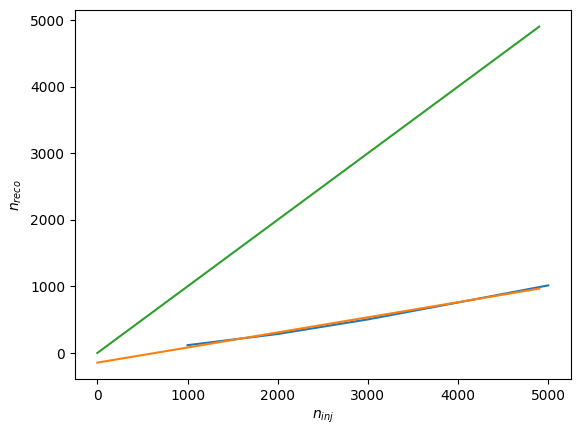

In [5]:
plt.plot(x_100GeV,y_100GeV)
plt.plot(x_diagonal,poly1d_fn(x_diagonal))
plt.plot(x_diagonal,x_diagonal)
plt.xlabel(r'$n_{inj}$')
plt.ylabel(r'$n_{reco}$')

In [6]:
(poly1d_fn-1).roots[0]

643.0145438519177

In [7]:
#if i want signal event number (0,300), what to inject? 
ns_reco=np.arange(0,301)
ns_inj=[]
for ns in ns_reco:
    ns_inj.append( (poly1d_fn-ns).roots[0] )
ns_input = [f'{np.round(np.asarray(num)):.1f}' for num in ns_inj]
#ns_input

In [8]:
ns_input

['639.0',
 '643.0',
 '647.0',
 '652.0',
 '656.0',
 '661.0',
 '665.0',
 '669.0',
 '674.0',
 '678.0',
 '683.0',
 '687.0',
 '691.0',
 '696.0',
 '700.0',
 '705.0',
 '709.0',
 '714.0',
 '718.0',
 '722.0',
 '727.0',
 '731.0',
 '736.0',
 '740.0',
 '744.0',
 '749.0',
 '753.0',
 '758.0',
 '762.0',
 '766.0',
 '771.0',
 '775.0',
 '780.0',
 '784.0',
 '788.0',
 '793.0',
 '797.0',
 '802.0',
 '806.0',
 '810.0',
 '815.0',
 '819.0',
 '824.0',
 '828.0',
 '833.0',
 '837.0',
 '841.0',
 '846.0',
 '850.0',
 '855.0',
 '859.0',
 '863.0',
 '868.0',
 '872.0',
 '877.0',
 '881.0',
 '885.0',
 '890.0',
 '894.0',
 '899.0',
 '903.0',
 '907.0',
 '912.0',
 '916.0',
 '921.0',
 '925.0',
 '929.0',
 '934.0',
 '938.0',
 '943.0',
 '947.0',
 '952.0',
 '956.0',
 '960.0',
 '965.0',
 '969.0',
 '974.0',
 '978.0',
 '982.0',
 '987.0',
 '991.0',
 '996.0',
 '1000.0',
 '1004.0',
 '1009.0',
 '1013.0',
 '1018.0',
 '1022.0',
 '1026.0',
 '1031.0',
 '1035.0',
 '1040.0',
 '1044.0',
 '1048.0',
 '1053.0',
 '1057.0',
 '1062.0',
 '1066.0',
 '10

In [9]:
# Add skyllh and i3skyllh projects to the PYTHONPATH
sys.path.insert(0, '/data/user/liruohan/software/skyllh')
sys.path.insert(0, '/data/user/liruohan/software/i3skyllh')
#sys.path.insert(0, '/home/liruohan/.local/lib/python3.7/site-packages')
#sys.path.insert(0, '/home/cbellenghi/.pyenv/versions/3.8.1/lib/python3.8/site-packages')

# Add missing python packages from cvmfs
#sys.path.insert(0, '/cvmfs/icecube.opensciencegrid.org/py3-v4.1.1/RHEL_7_x86_64/lib/python3.7/site-packages')
extra_path = "/cvmfs/icecube.opensciencegrid.org/users/tkontrimas/software/pip/python3.11/site-packages" # whatever individual directory it is
if extra_path not in sys.path:
    sys.path.append(extra_path)

from skyllh.core.utils.analysis import calculate_critical_ts_from_gamma

In [10]:
# sensitivity
# bkg_p = 0.5
# sig_p = 0.9
# 3 sigma dp
# bkg_p = norm.sf(3,0,1)
# sig_p = 0.5
# 5 sigma dp
bkg_p = norm.sf(5,0,1)
sig_p = 0.5

In [11]:
trial_bkg_dir='/data/user/liruohan/LE/trials/bkg'
bkg_trials = np.concatenate([np.load(f) for f in glob.glob(os.path.join(trial_bkg_dir, '*.npy'))])
ts_critical = calculate_critical_ts_from_gamma(bkg_trials['ts'], bkg_p)

In [12]:
ts_critical

30.91318329917722

In [13]:
# def get_data(indir, ns_str_list, var='ns'):
    
#     data = []
#     means = []

#     for ns in ns_str_list:
#         print(ns)
#         vals = []
#         inf = os.path.join(indir,  "mean_ns_inj"+ns+"_mean_ns_fit*"+"_trials20_"+"rss*.npy") #mean_ns_inj996.0_mean_ns_fit81_trials20_rss99.npy
#         print(inf)
#         infs = sorted(glob.glob(inf))
#         #print(infs)
#         for inf in infs:
#             dat = np.load(inf)
#             vals += dat[var].tolist()

#         data.append(np.percentile(vals, [2.5, 16,50,84, 97.5]))
#         means.append(np.mean(vals))
#         #print(data)
#     return(data, means)

In [14]:
trial_sig_dir='/data/user/liruohan/LE/trials/sig'
#test_dir='/data/user/liruohan/LE/trials/sig/mean_ns_inj643.0_mean_ns_fit1_trials20_rss93.npy'

In [15]:
percentage_above_bkg = []
percentage_above_critical_ts = []
mean_ns_inj = []
for ns in ns_input:
    
    fpath = trial_sig_dir + '/mean_ns_inj{}_mean_ns_fit*_trials20_rss*.npy'.format(str(ns))
    #print(fpath)
    sig_trials = np.concatenate([np.load(f) for f in glob.glob(fpath)])
    
    mean_ns_inj.append(ns)
    # Calculate ns for percentile above background median
    #print(sig_trials['ts'])
    percentage_above_bkg.append((
        np.sum(sig_trials['ts'] > np.median(bkg_trials['ts']))
    )/sig_trials.size)

    # Calculate ns for percentile above background median
    percentage_above_critical_ts.append((
        np.sum(sig_trials['ts'] > ts_critical)
    )/sig_trials.size)

/data/user/liruohan/LE/trials/sig/mean_ns_inj639.0_mean_ns_fit*_trials20_rss*.npy
[-6.03705471e-14  5.33568825e+00  1.39047326e+00 -5.02579798e-13
 -9.94895499e-10  4.05560222e+00  1.07342983e+01 -1.10590277e-09
  1.02670358e+00 -2.53349954e-12  2.63789796e+00  9.73058799e+00
 -4.73235424e-11  7.28715575e+00 -1.73962133e-10  6.15979751e+00
  2.32743008e+00 -1.80645763e-14  6.09191487e+00  9.01732549e+00
  6.01295619e-02  1.15995635e+00  1.54529442e+00  9.70600121e+00
 -2.37578270e-14  7.35072468e+00  1.04700212e+00  3.59545380e+00
  1.36189139e-01  8.34959729e+00  4.12004860e+00 -5.98890345e-12
  1.40478024e+00 -5.50931506e-11 -1.65916319e-12  4.97657264e-01
  5.97824924e-02  4.99907909e+00  1.09086300e-01 -1.60839493e-10
  5.28849622e+00  3.76220471e+00  7.31708637e+00 -2.75631096e-14
  2.30982161e+00  2.19352802e-01  2.86573697e+00  2.68390253e+00
  4.78479861e-03  1.63673479e+00  3.98519837e+00 -4.29337363e-13
  2.77921523e-03  2.00266648e+01  9.33297739e+00  2.64391393e+00
 -2.8770

ValueError: need at least one array to concatenate

In [16]:
# define a function as the spline minus
# the fraction of signal trials above critical TS
def func(mu, spline, perc):
    y = spline.evaluate_simple([mu])
    y = y - perc
    return y

In [17]:
from photospline import (
    SplineTable,
    glam_fit,
    ndsparse,
)

In [18]:
def construct_photospline(n_max, x, y, order=3, smoothing=1, penalty=2):
    """Constructs a penalized B-spline using the photospline package.

    Parameters
    ----------
    n_max: int
        value to construct the range for the spline knots.
    x: sequence of float
        List or array of x values for the spline construction.
    y: sequence of float
        List or array of y values for the spline construction.
    order: int
        Order of the penalized B-spline.
    smoothing: float
        Regularization factor for the penalized B-spline.
    penalty: int
        Penalty factor for the penalized B-spline.

    Returns
    -------
    spline: instance of photospline.SplineTable
    """
    
    knots = np.arange(-0.1,n_max+1, 0.3)
    spline = glam_fit(
        *ndsparse.from_data(
            np.array(y),
            np.ones(np.array(y).shape)),
        [np.array(x)],
        [knots],
        [order] * np.array(x).ndim,
        [smoothing],
        [penalty],
    )

    return spline

In [35]:
# Create interpolation spline for sensitivity and disc potential
n_max = 300
mean_ns_inj = np.arange(0,300,1)
spline_sens = construct_photospline(
    n_max, mean_ns_inj, percentage_above_bkg)
# spline_dp = construct_photospline(
#     n_max, mean_ns_inj, percentage_above_critical_ts)

# use scipy to find root
ns_sens = root_scalar(func, args=(spline_sens, 0.9), bracket=[0.1, n_max]).root
print(f'\nMean number of signal events for sensitivity: {ns_sens}')

# ns_dp = root_scalar(func, args=(spline_dp, 0.5), bracket=[0.1, n_max]).root
# print(f'Mean number of signal events for 5sigma discovery potential: {ns_dp}')


Mean number of signal events for sensitivity: 94.07050357758938


In [36]:
def plot_ax(ax, n_max, x, y, spline, perc, ns_crit):
    """Plots the (x,y) data on a scatter plot and
    the corresponding spline interpolation on the given
    axis `ax`.
    It also indicated the critical percentile value
    and the correspoding mean number of signal events.

    Parameters
    ----------
    ax: instance of matplotlib.axes.Axes
        The figure axis where to plot.
    n_max: int
        Maximum value for the spline x range.
    x: sequence of float
        List or array of x values for the scatter plot.
    y: sequence of float
        List or array of y values for the scatter plot.
    spline: instance of photospline.SplineTable
        The penalized B-spline interpolating y(x).
    perc: float
        The critical percentile
    ns_crit: float
        The mean number of signal events to get the critical percentile.
    """

    spline_xrange = np.linspace(0.1,n_max,100)

    if perc == 0.9:
        data_label = "above bkg median"
    else:
        data_label = "above critical TS"

    ax.scatter(x, y, s=15, c='k', label="% TS "+data_label)
    ax.plot(
        spline_xrange, spline.grideval([spline_xrange]),
        lw=2, ls='--', label="Photospline")
    ax.axhline(perc)
    ax.axvline(ns_crit, ls='--', c='r')

    ax.set_ylabel("p > "+data_label+" [%]", size=12)
    ax.set_xlabel('<$\mu_{inj}$>', size=12)

    ax.legend(frameon=False, prop={'size':10})

    return

NameError: name 'ns_dp' is not defined

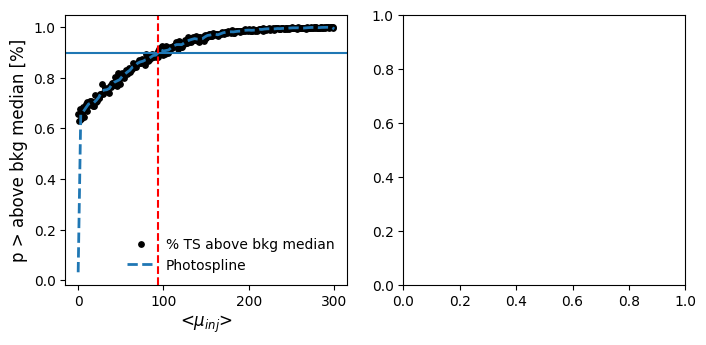

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (8,3.5))
plot_ax(
    ax1, n_max, mean_ns_inj, percentage_above_bkg, 
    spline_sens, 0.9, ns_sens)
plot_ax(
    ax2, n_max, mean_ns_inj, percentage_above_critical_ts, 
    spline_dp, 0.5, ns_dp)

plt.subplots_adjust(wspace=.35)

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

x_data = np.arange(0,300,1)
y_data = (np.asarray(percentage_above_critical_ts)).copy()

# --- Step 1: Smooth the data ---
# The window_length must be an odd integer. A larger value creates a smoother curve.
# The polyorder must be less than the window_length. It's the order of the polynomial
# used to fit the samples.
window_length = 51
polyorder = 3
# By setting mode='nearest', we ensure the output array has the same length as the input,
# which avoids dimension mismatch errors that can occur in different versions of the SciPy library.
y_smoothed = savgol_filter(y_data, window_length, polyorder, mode='nearest')

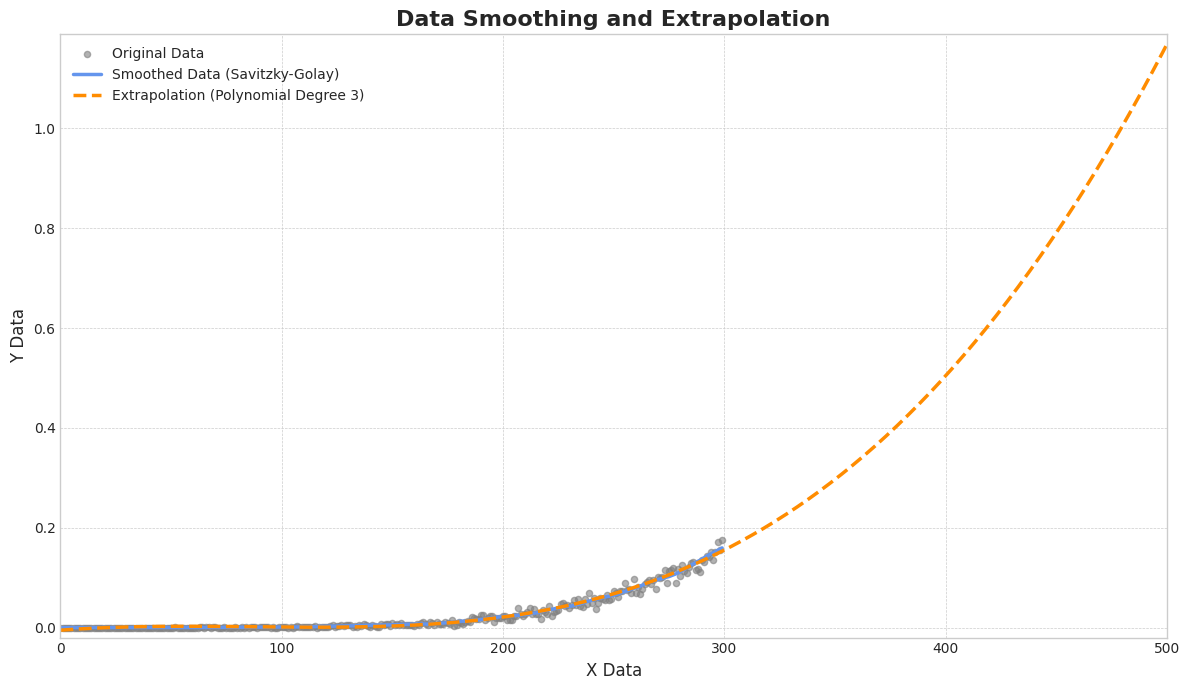

In [40]:
# --- Step 2: Extrapolate the data ---
# We will fit a polynomial to the *smoothed* data to capture the trend.
# A degree of 2 (quadratic) is often a good starting point.
degree = 3
coeffs = np.polyfit(x_data, y_smoothed, degree)
poly_func = np.poly1d(coeffs)

# Define the range for extrapolation
# Let's extrapolate out to x = 400
x_extrapolate = np.arange(0, 501)
y_extrapolate = poly_func(x_extrapolate)

# --- Step 3: Plot the results ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 7))

# Plot original data
ax.scatter(x_data, y_data, label='Original Data', color='gray', alpha=0.6, s=20)

# Plot smoothed data
ax.plot(x_data, y_smoothed, label=f'Smoothed Data (Savitzky-Golay)', color='cornflowerblue', linewidth=2.5)

# Plot extrapolated data
ax.plot(x_extrapolate, y_extrapolate, label=f'Extrapolation (Polynomial Degree {degree})', color='darkorange', linestyle='--', linewidth=2.5)

# Formatting the plot
ax.set_title('Data Smoothing and Extrapolation', fontsize=16, fontweight='bold')
ax.set_xlabel('X Data', fontsize=12)
ax.set_ylabel('Y Data', fontsize=12)
ax.legend(fontsize=10)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Set plot limits for better visualization
ax.set_xlim(left=0, right=500)
ax.set_ylim(bottom=min(y_data) - 0.02, top=max(y_extrapolate) + 0.02)

plt.tight_layout()
plt.show()

In [41]:
(poly_func-0.5).roots[0]

(399.1077592501061+0j)